# Week 3 - Machine Learning Essentials

This is an introduction to the basics of machine learning.

**What is the difference between this task and the one from last week?**

Not interested in causality, but prediction.

## Set up and load data

In [2]:
# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

# to make this notebook's output identical at every run
np.random.seed(42)

In the first part of this notebook we want to predict the house prices in Boston with a 13 features . The data was collected in 1978 and each of the 506 entries represents aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.

**Which model would you use for this prediction task?**

Regression

In [3]:
from sklearn.datasets import load_boston
data = load_boston() # object is a dictionary
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Data Set Characteristics:

In [4]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
X_full, y_full = data.data, data.target
n_samples = X_full.shape[0] # get number of observations
n_features = X_full.shape[1] # get number of (predictive) variables
n_samples

506

In [6]:
X_df=pd.DataFrame(X_full, columns=data['feature_names'])
X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


No null values in the dataset:

In [7]:
X_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

## Exploratory Data Analysis

### Quantity to predict= price (`target`) 

Before the regression, let us inspect the features and their distributions. 

In [11]:
y_full.shape

(506,)

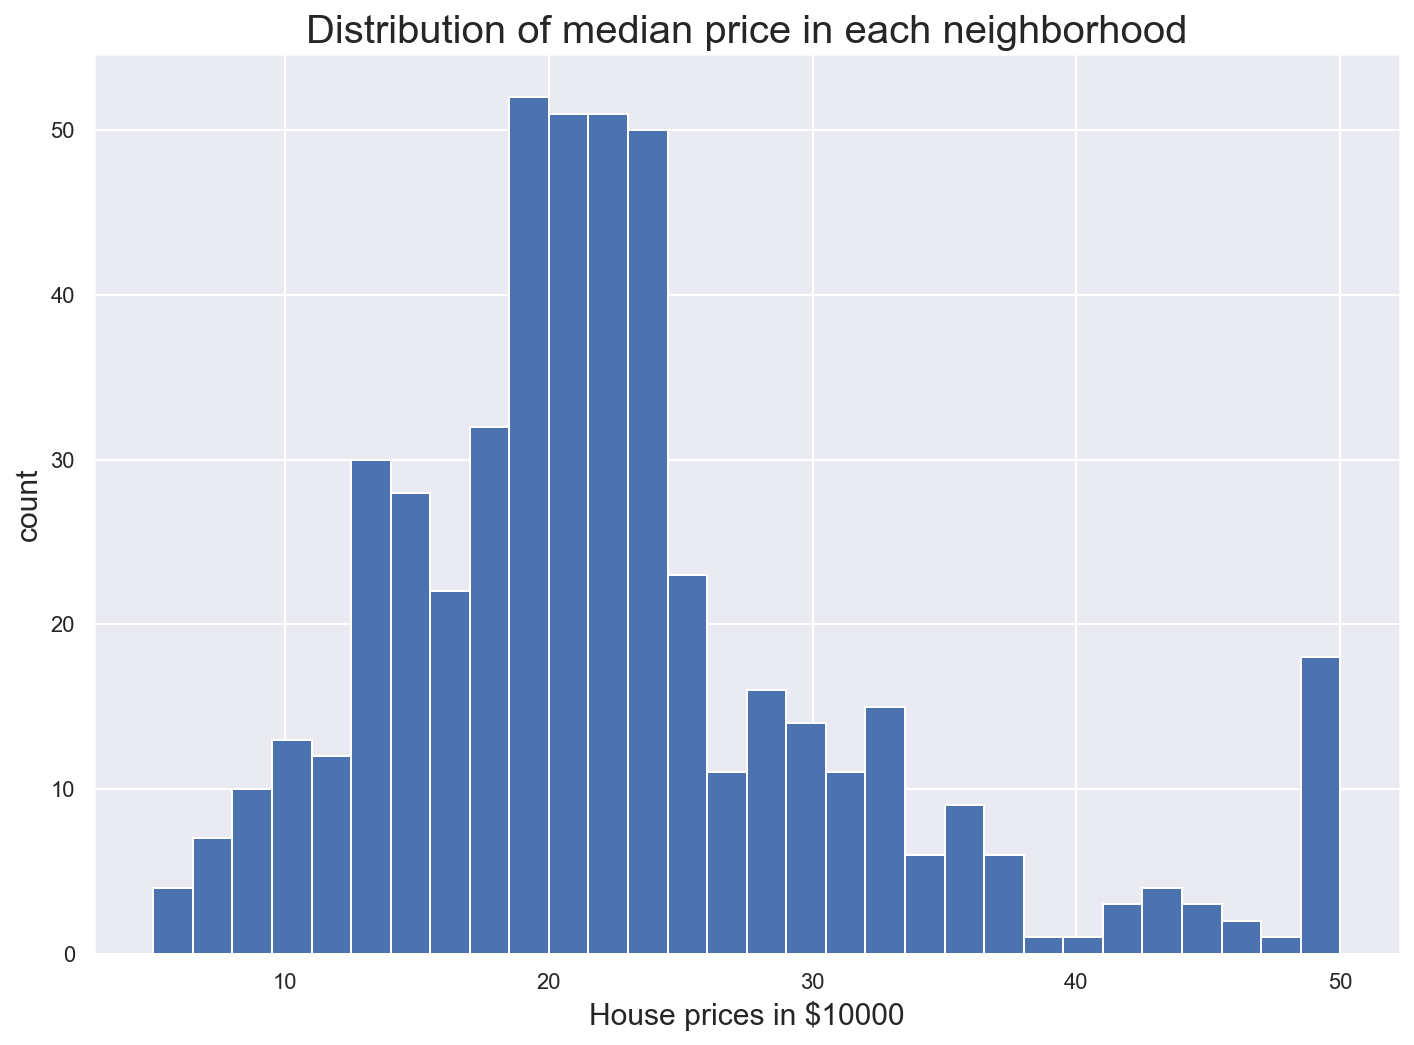

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(y_full, bins=30)
plt.xlabel("House prices in $10000", size=15)
plt.ylabel('count', size=15)
plt.title('Distribution of median price in each neighborhood', size=20)
plt.show()

### Features used for prediction

In [11]:
X_full.shape

(506, 13)

#### Distributions
**Histogram plots** to look at the distribution

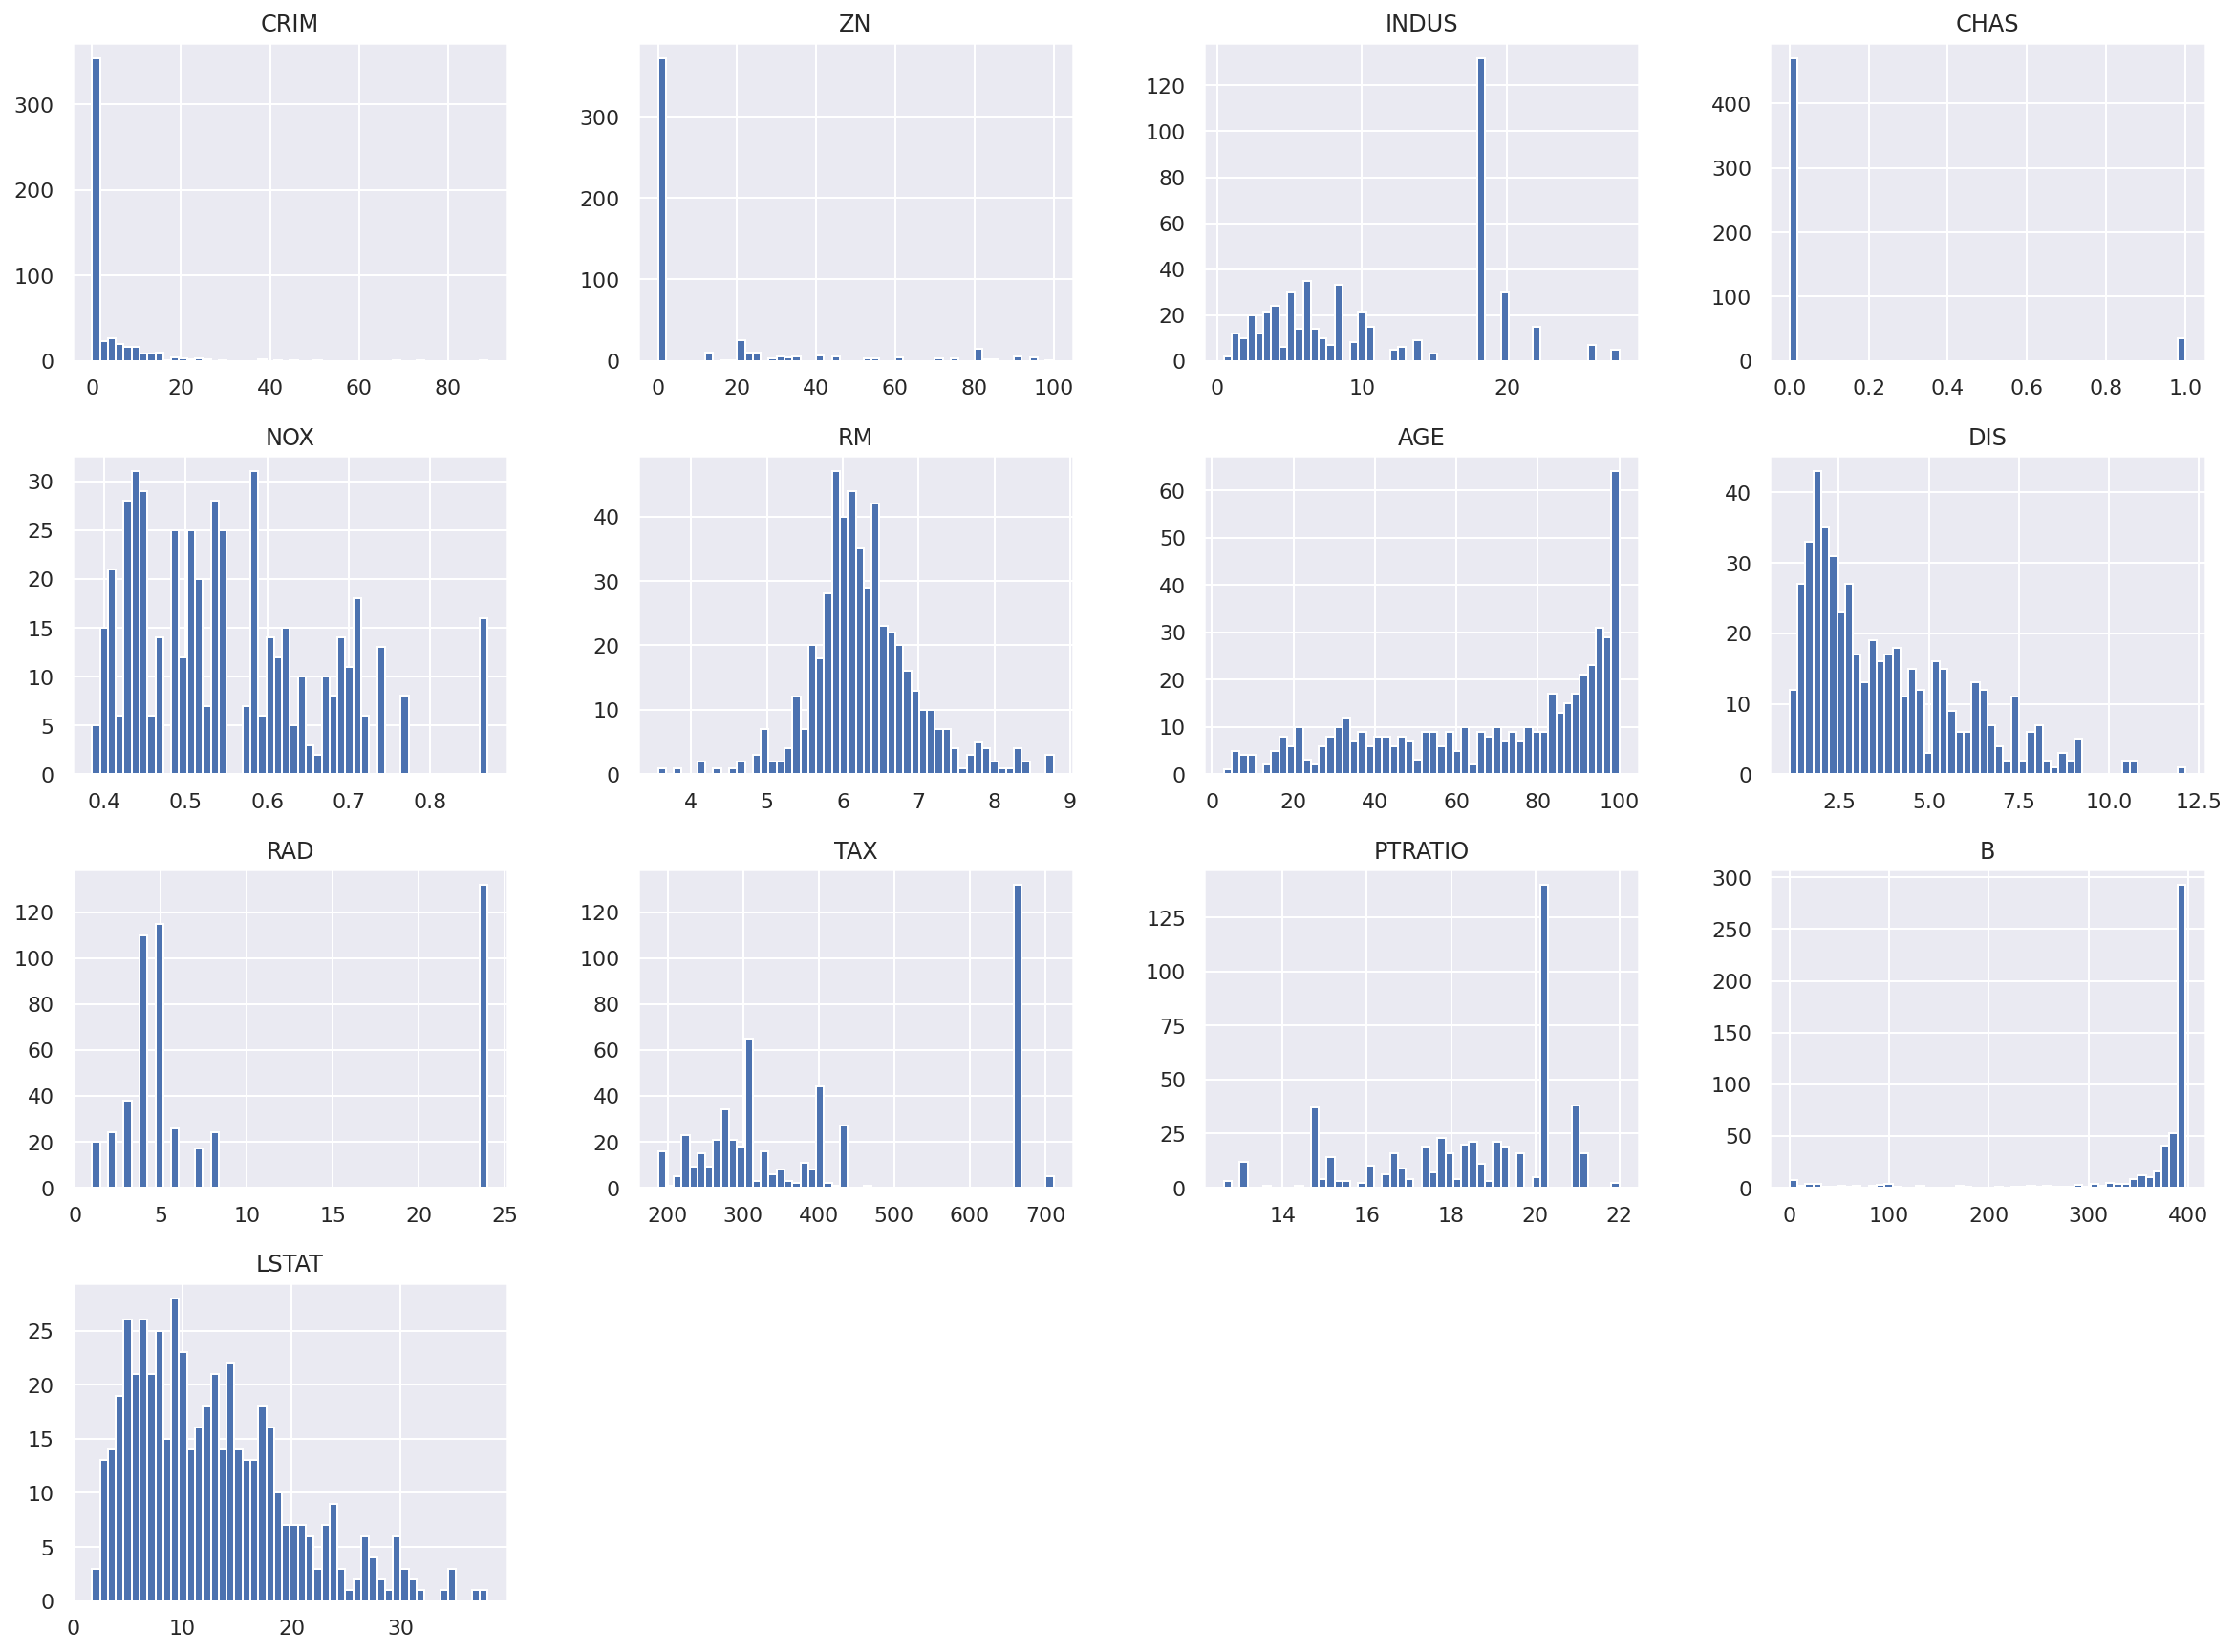

In [13]:
X_df.hist(bins=50, figsize=(20,15))
plt.show()

#### Correlations


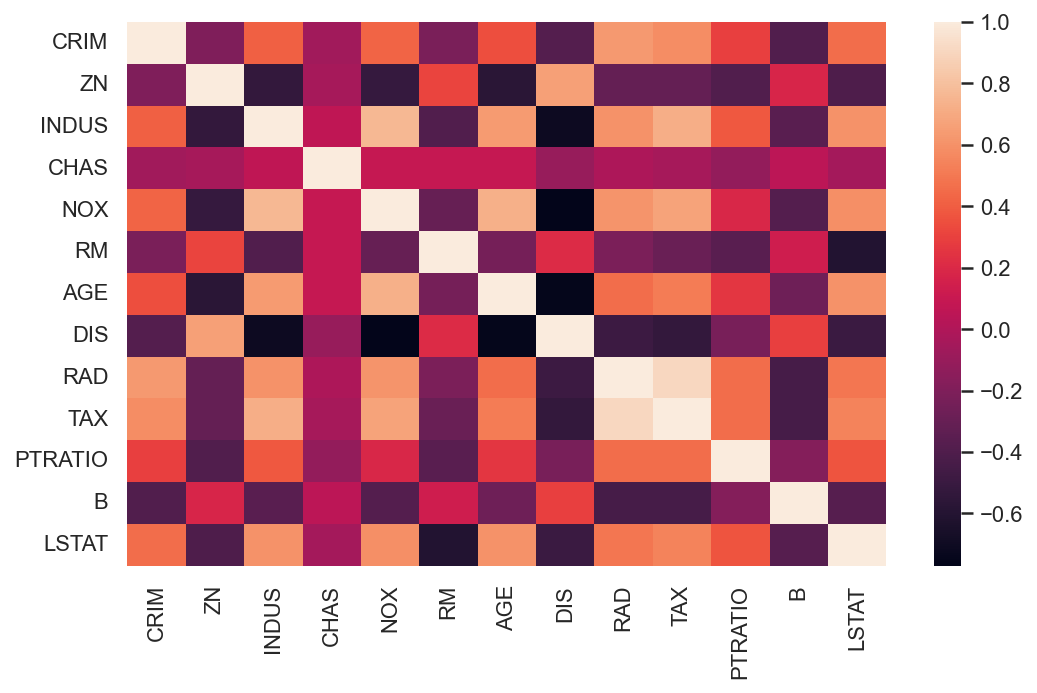

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8.5,5)})
correlation_matrix = X_df.corr().round(2)
sns.heatmap(correlation_matrix) #annot=True
plt.show()

In [13]:
print(correlation_matrix)

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.39  0.18  -0.36  

An important point in selecting features for a linear regression model is to check for multicolinearity.

**Which variables would you NOT include in the model?**

RAD and TAX -> not include both.  
If correlation higher than about 0.9, should try without and with both variables.

Correlation plots:

array([[<AxesSubplot:xlabel='DIS', ylabel='DIS'>,
        <AxesSubplot:xlabel='AGE', ylabel='DIS'>,
        <AxesSubplot:xlabel='RAD', ylabel='DIS'>,
        <AxesSubplot:xlabel='TAX', ylabel='DIS'>],
       [<AxesSubplot:xlabel='DIS', ylabel='AGE'>,
        <AxesSubplot:xlabel='AGE', ylabel='AGE'>,
        <AxesSubplot:xlabel='RAD', ylabel='AGE'>,
        <AxesSubplot:xlabel='TAX', ylabel='AGE'>],
       [<AxesSubplot:xlabel='DIS', ylabel='RAD'>,
        <AxesSubplot:xlabel='AGE', ylabel='RAD'>,
        <AxesSubplot:xlabel='RAD', ylabel='RAD'>,
        <AxesSubplot:xlabel='TAX', ylabel='RAD'>],
       [<AxesSubplot:xlabel='DIS', ylabel='TAX'>,
        <AxesSubplot:xlabel='AGE', ylabel='TAX'>,
        <AxesSubplot:xlabel='RAD', ylabel='TAX'>,
        <AxesSubplot:xlabel='TAX', ylabel='TAX'>]], dtype=object)

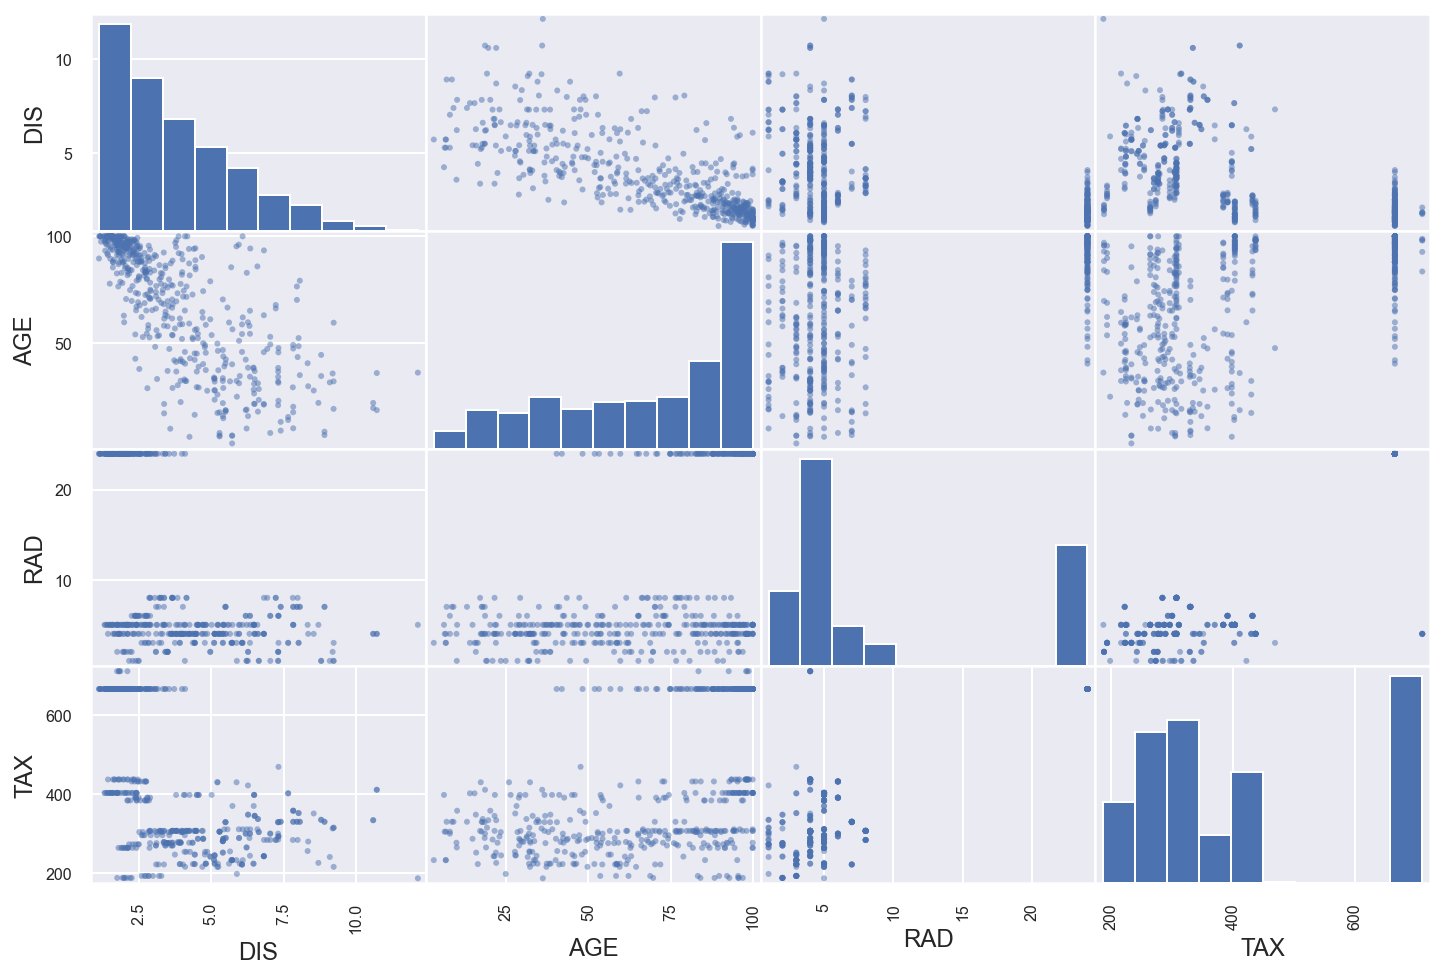

In [42]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_df[['DIS', 'AGE','RAD', 'TAX']], figsize=(12, 8))

#### Scatter plot relative to the target (price)

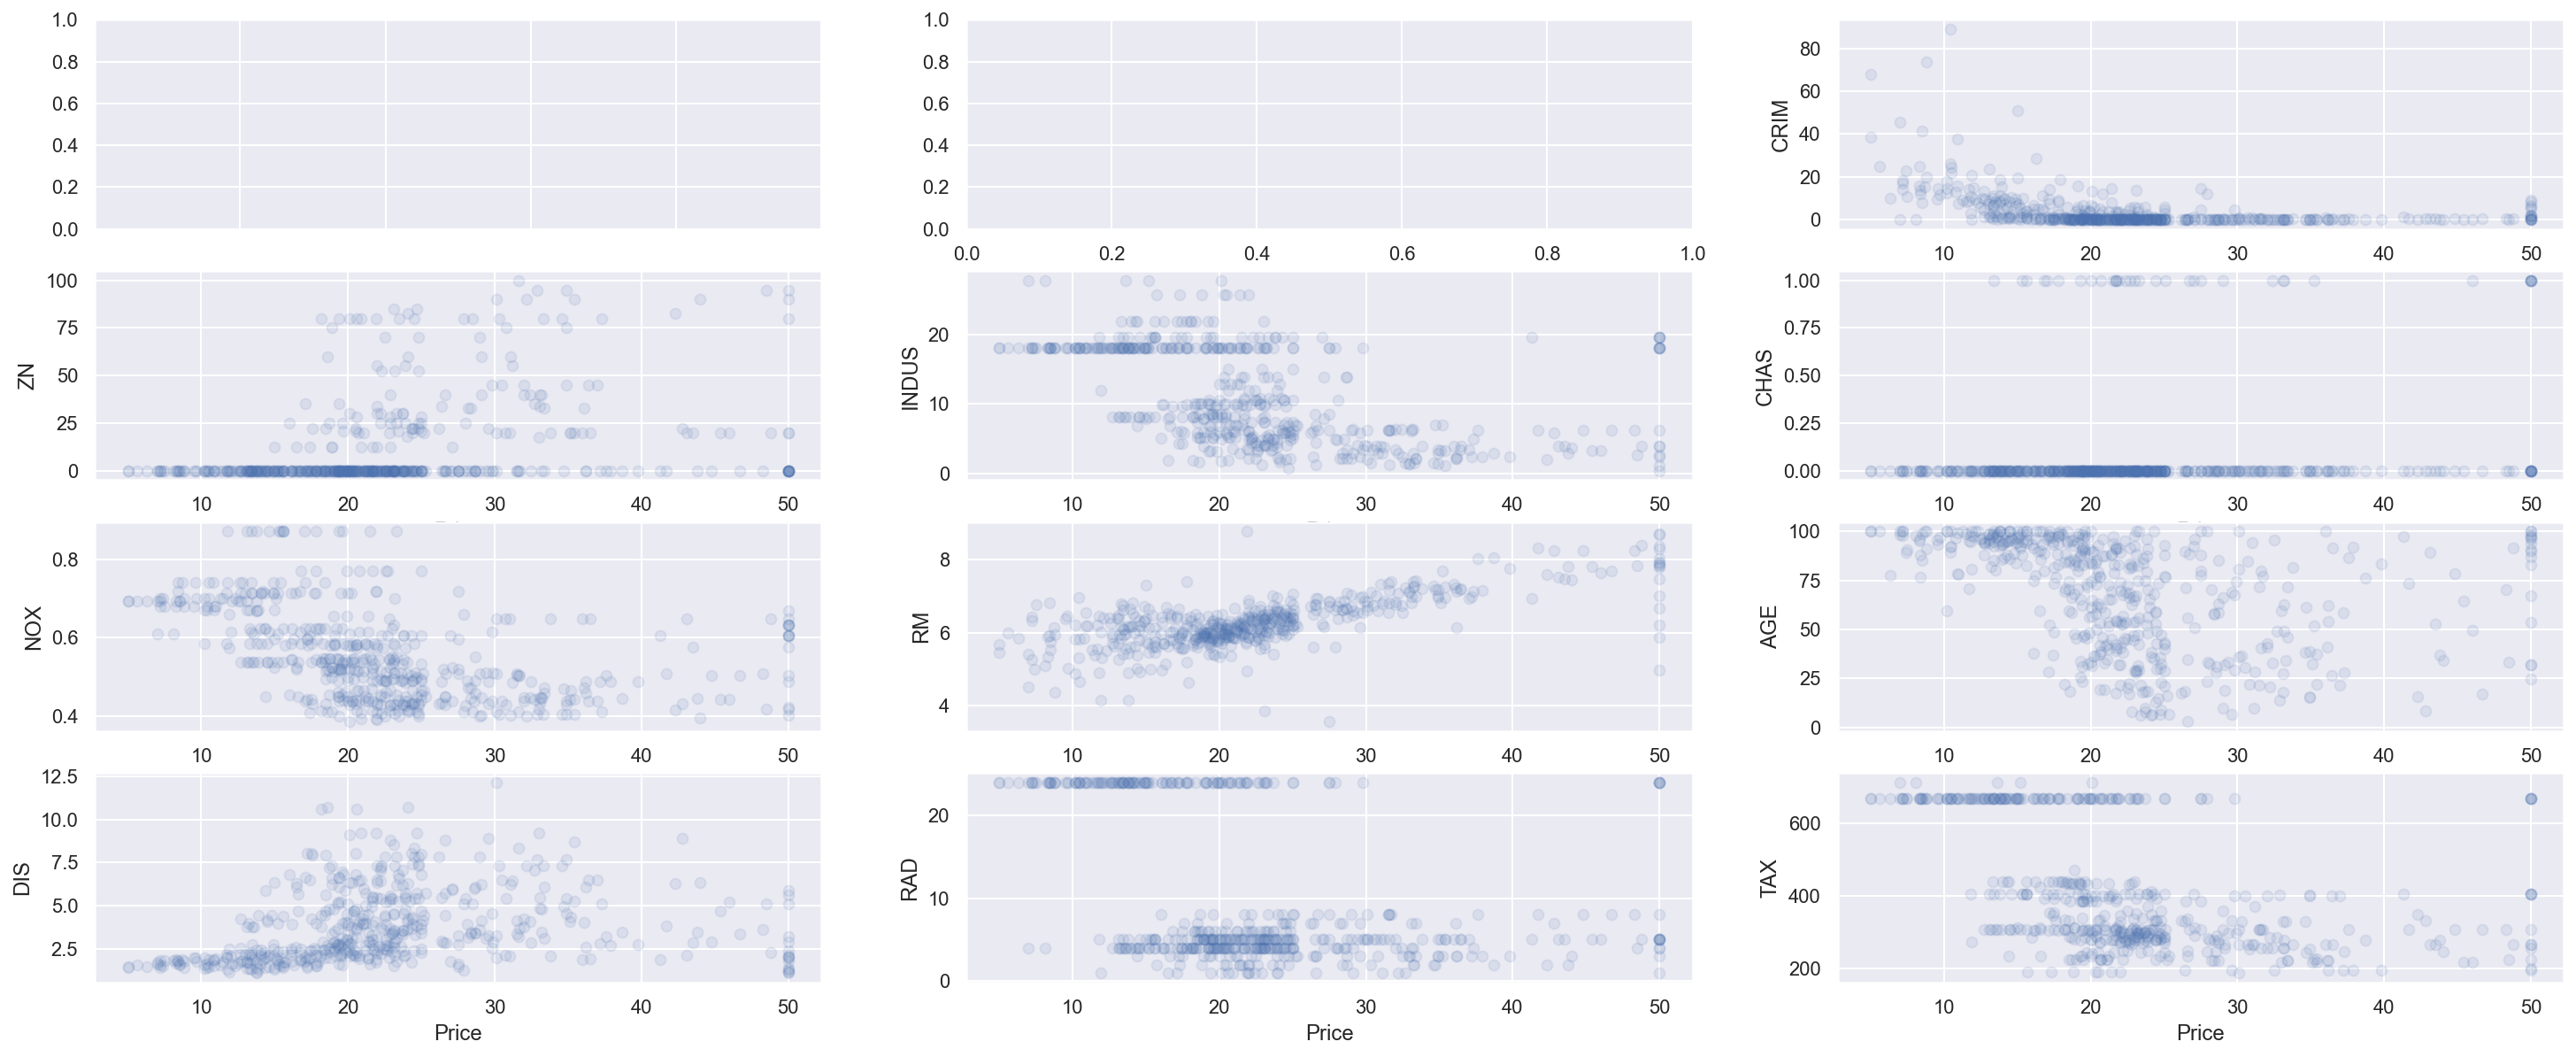

In [14]:
fig, ax = plt.subplots(4, 3, figsize=(25,10))
axe = ax.ravel()
axe[0].set_xticklabels([])
axe[0].set_xlabel(' ')
for i, feature_name in zip(range(1,11), X_df.columns):
    axe[i+1].scatter(y_full, X_df[feature_name], alpha=0.1)
    axe[i+1].set_xlabel('Price')
    axe[i+1].set_ylabel(feature_name)

**What can we say about these correlations?**

Strong relationship between number of rooms and price.

## Prepare the data for ML algorithms

### Drop some labeled observations:

Drop the observations with price >=50 (because of the right censure)

In [15]:
X_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [20]:
mask=y_full<50

features_keep = [...]
X_full = X_full[features_keep]

y_full=y_full[mask==True]
X_full=X_full[mask==True]
X_df=X_df[mask==True]

### Split train test sets 
#### using `train_test_split`
Pure ramdomness of the sampling method

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full,test_size=0.2, random_state=1)

In [23]:
print("train data", X_train.shape, y_train.shape)
print("test data", X_test.shape,  y_test.shape)

train data (392, 13) (392,)
test data (98, 13) (98,)


#### Data cleaning
The missing features should be:
1. dropped
2. imputed to some value (zero, the mean, the median...)

**Which option do you think is best?**

Depends on the specific case, f.ex. the size of the sample and the number of missing data. Not impute zero.

In [24]:
from sklearn.preprocessing import OrdinalEncoder # for categorical values

#### Feature Scaling
Most common scaling methods: 
- **standardization**= normalization by substracting the mean and dividing by the standard deviation (values are not bounded)
- **Min-max scaling**= normalization by substracting the minimum and dividing by the maximum (values between `0` and `1`)

Reason to do scaling: if variables have very different scales, it just adds complexity to the model. But does not matter for regression trees.

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train) # can add with_mean=False to not take out mean
X_test_scaled = scaler.transform(X_test)

## Select and Train a Model

### Simple Linear Regression

In [26]:
# our first machine learning model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

<div class="alert alert-block alert-warning">
    <i class="fa fa-warning"></i>&nbsp;<strong><code>scikit-learn</code> API</strong>

In <code>scikit-learn</code> all regression algorithms have:
<ul>
    <li>a <strong><code>fit()</code></strong> method to learn from data, and</li>
    <li>and a subsequent <strong><code>predict()</code></strong> method for predicting numbers from input features.</li>
</ul>
</div>

In [27]:
lin_reg.fit(X_train, y_train)
print("R-squared for training dataset:{}".
      format(np.round(lin_reg.score(X_train, y_train), 2)))

R-squared for training dataset:0.79


In [28]:
lin_reg.fit(X_train_scaled, y_train)
print("R-squared for training dataset & scaled features:{}".
      format(np.round(lin_reg.score(X_train_scaled, y_train), 2)))

R-squared for training dataset & scaled features:0.79


Coefficients of the linear regression:

In [47]:
# lin_reg.coef_

features = list(X_df.columns)

print('The coefficients of the features from the linear model:')
print(dict(zip(features, [round(x, 2) for x in lin_reg.coef_])))

The coefficients of the features from the linear model:
{'CRIM': -692512720.5, 'ZN': -7.2, 'INDUS': 0.06, 'CHAS': -4.19, 'NOX': 16.0, 'RM': 14.71, 'AGE': 1.64, 'DIS': 0.93, 'RAD': -12.26, 'TAX': 2.45, 'PTRATIO': -0.07, 'B': 0.98, 'LSTAT': -0.0}


### Metrics / error measures   

`scikit-learn` offers the following metrics for measuring regression quality:

#### Mean absolute error

This is the metric we used before. Taking absolute values before adding up the deviatons assures that deviations with different signs can not cancel out.

<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; <strong>mean absolute error</strong> is defined as 


$$
\frac{1}{n} \left(\, |y_1 - \hat{y}_1| \, + \, |y_2 - \hat{y}_2| \, + \, \ldots \,+ \,|y_n - \hat{y}_n| \,\right)
$$


</div>


The name of the corresponding score in `scikit-learn` is `neg_mean_absolute_error`.


#### Mean squared error

Here we replace the absolute difference by its squared difference. Squaring also insures positive differeces.


<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; <strong>mean squared error</strong> is defined as 



$$
\frac{1}{n} \left(\, (y_1 - \hat{y}_1)^2 \, + \, (y_2 - \hat{y}_2)^2 \, \, \ldots \,+ \,(y_n - \hat{y}_n)^2 \,\right)
$$


</div>



This measure is more sensitive to outliers: A few larger differences contribute more significantly to a larger mean squared error. The name of the corresponding score in `scikit-learn` is `neg_mean_squared_error`.


#### Median absolute error

Here we replace mean calculation by median. 

<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; <strong>median absolute error</strong> is defined as 



$$
\text{median}\left(\,|y_1 - \hat{y}_1|, \,|y_2 - \hat{y}_2|, \,\ldots, \,|y_n - \hat{y}_n| \, \right)
$$


</div>


This measure is less sensitive to outliers than the metrics we discussed before: A few larger differences will not contribute significantly to a larger error value. The name of the corresponding score in `scikit-learn` is `neg_median_absolute_error`.

#### Mean squared log error

The formula for this metric can be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-log-error). 

This metric is recommended when your target values are distributed over a huge range of values, like popoluation numbers. 
The previous error metrics would put a larger weight on large target values. One could consider relative deviations to compensate such effects but relative deviations come with other problems like division by zero.


The name is `neg_mean_squared_log_error`

In [31]:
from sklearn.metrics import mean_squared_error

# in-sample performance
y_train_pred = lin_reg.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("RMS: %s" % train_rmse) # = np.sqrt(np.mean((predicted - expected) ** 2)) 

RMS: 843.9120250192732


**What do we need to do to check if the model is performing well?**

In [33]:
y_test_pred = lin_reg.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(test_mse)
print("RMS: %s" % rmse) 

RMS: 837.0193013813176


#### $r^2$-score

One other score to mention is the $r^2$-score, for which larger values indicate better regression results.

**What does the R2 indicate?**

How much of the variance in the data does the model explain?

In [34]:
from sklearn.metrics import r2_score
r2=round(r2_score(y_test, y_test_pred), 2)
print("R2: %s" % r2) 

R2: -12457.24


A negative R^2 -> model performs really bad!

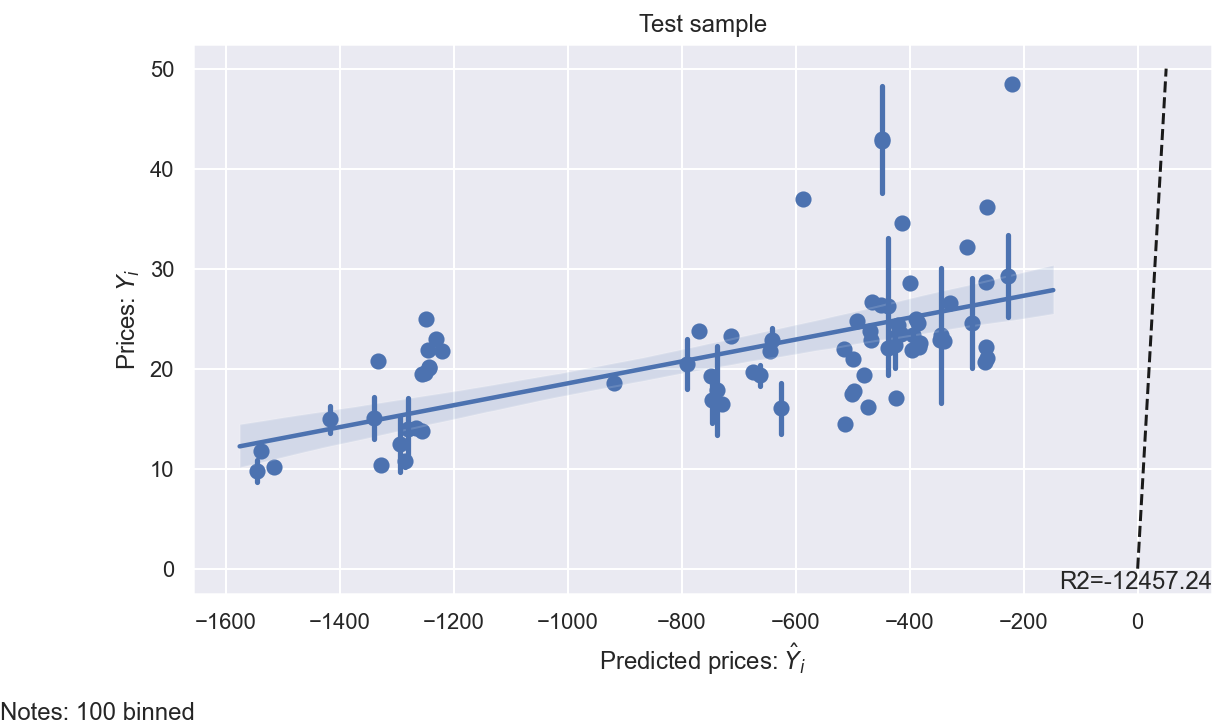

In [35]:
# Regplot
g=sns.regplot(x= y_test_pred, y=y_test, x_bins=100)
g=g.set_title("Test sample")
plt.xlabel("Predicted prices: $\hat{Y}_i$")
plt.ylabel("Prices: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

**What is the main problem you see here?**

Model delivers negative predictions for prices.

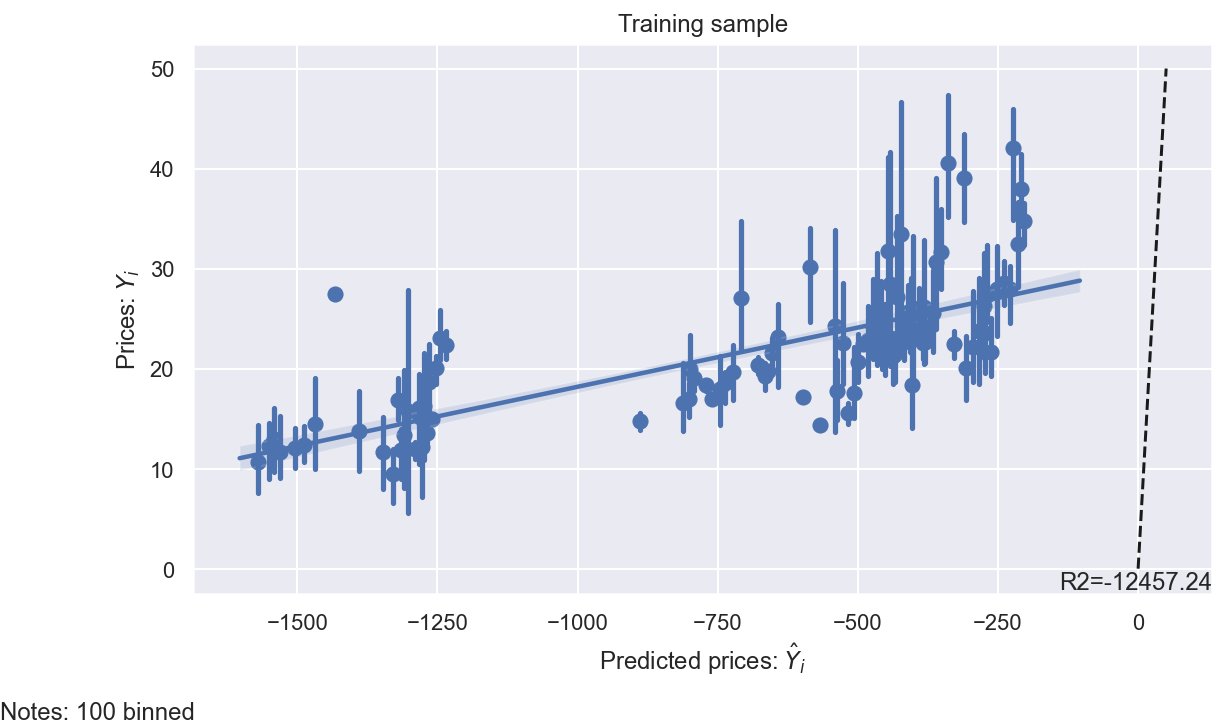

In [36]:
# Regplot
g=sns.regplot(x= y_train_pred, y=y_train, x_bins=100)
g=g.set_title("Training sample")
plt.xlabel("Predicted prices: $\hat{Y}_i$")
plt.ylabel("Prices: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

### Some algorithms from sklearn

- `sklearn.linear_model.LinearRegression` is a linear regression method, which only works well for target values which can be described as a linear combination of feature values.


- `sklearn.kernel_ridge.KernelRidge` is [documented here](https://scikit-learn.org/stable/modules/kernel_ridge.html#kernel-ridge). It combines the kernel trick from SVMs with classical least squares regression.


- `sklearn.svm.SVR` is an extension of support vector classification concept to regression, [you find examples here](https://scikit-learn.org/stable/modules/svm.html#svm-regression)


- `sklearn.neighbors.KNeighborsRegressor` extends the idea of nearest neighbour classification to regression: Search for similar data points in the learning data set and compute the predicted value from the values from the neighbourhood, e.g. by averaging or by linear interpolation. [Documentation is available here](https://scikit-learn.org/stable/modules/neighbors.html#regression)


- `sklearn.tree.DecisionTreeRegressor` expands the concept of decision trees to regression [is documented here](https://scikit-learn.org/stable/modules/tree.html#regression).




In [37]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=2, solver='cholesky')       
ridge_reg.fit(X_train, y_train)

y_train_pred = ridge_reg.predict(X_train)
y_test_pred = ridge_reg.predict(X_test)        
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2)) 

test RMS: 3.8991529766060644
train R2: 0.78
test R2: 0.73


**How do you think this model performs compared to the linear regression?**

Much better.

#### Polynomial regression

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2)
X_train_poly=poly_features.fit_transform(X_train) # add squared variables and all interactions
X_test_poly=poly_features.fit_transform(X_test) # add squared variables and all interactions

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train) # fit linear model with added variables

y_test_pred = lin_reg.predict(X_test_poly)
test_rmse = mean_squared_error(y_test,y_test_pred)
test_rmse = np.sqrt(test_rmse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2))

test RMS: 3.7051966435021453
train R2: 0.78
test R2: 0.76


#### Lasso regression

In [44]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=1)       
lasso_reg.fit(X_train, y_train)

y_test_pred = lasso_reg.predict(X_test)        
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2)) 

test RMS: 4.579918320353293
train R2: 0.78
test R2: 0.63


With scaled X:

In [45]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=1)       
lasso_reg.fit(X_train_scaled, y_train)

y_test_pred = lasso_reg.predict(X_test_scaled)        
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2)) 

test RMS: 4.342235733030307
train R2: 0.78
test R2: 0.66


With scaled data, the model performs better.

In [48]:
print('The coefficients of the features from the Lasso model:')
print(dict(zip(features, [round(x, 2) for x in lasso_reg.coef_])))

The coefficients of the features from the Lasso model:
{'CRIM': -0.0, 'ZN': 0.0, 'INDUS': -0.23, 'CHAS': 0.0, 'NOX': -0.0, 'RM': 2.02, 'AGE': -0.0, 'DIS': 0.0, 'RAD': -0.0, 'TAX': -0.64, 'PTRATIO': -1.17, 'B': 0.06, 'LSTAT': -2.88}


**What can we learn from these coefficients?**

We can learn nothing from these coefficients. Because if we fit the lasso several times, it does not use the same variables each time. So a variable with a zero is not necessarily less important for the model. 

#### Elastic Net

In [49]:
from sklearn.linear_model import ElasticNet
elanet_reg=ElasticNet(random_state=0)
elanet_reg.fit(X_train_scaled, y_train)

y_test_pred = elanet_reg.predict(X_test_scaled)        
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2)) 

test RMS: 4.3638219635978235
train R2: 0.78
test R2: 0.66


#### Setting the **regularization parameter**: generalized Cross-Validation.

In [46]:
np.logspace(-6, 6, 13) # evenly spaced sequence on log scale from -6 to 6, with 13 numbers

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [50]:
from sklearn import linear_model
lassocv_reg = linear_model.LassoCV(alphas=np.logspace(-6, 6, 13))
lassocv_reg.fit(X_train, y_train)
alpha=lassocv_reg.alpha_ 
print("Best alpha", alpha)

Best alpha 0.001


Then re-run the model using the best alpha:

In [51]:
lasso_reg=Lasso(alpha=alpha)       

lasso_reg.fit(X_train_scaled, y_train)

y_train_pred=lasso_reg.predict(X_train_scaled)
y_test_pred = lasso_reg.predict(X_test_scaled)        
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2)) 

test RMS: 3.881814011244505
train R2: 0.79
test R2: 0.73


## Fine-tuning of the Model

### Model Evaluation using Cross-Validation

<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; cross_val_score expect a utility function rather than a cost function: the scoring function is the opposite of the MSE. 
</div>


In [53]:
from sklearn.model_selection import cross_val_score, cross_val_predict
# Perform 6-fold cross validation
scores = cross_val_score(elanet_reg, X_train_scaled, y_train, 
                         scoring="neg_mean_squared_error", cv=5)
scores

array([-14.96383737, -20.02416214, -20.20072418, -22.69197907,
       -19.66651518])

In [54]:
# Make cross validated predictions
y_train_pred_cv = cross_val_predict(elanet_reg, X_train_scaled, y_train, cv=5)

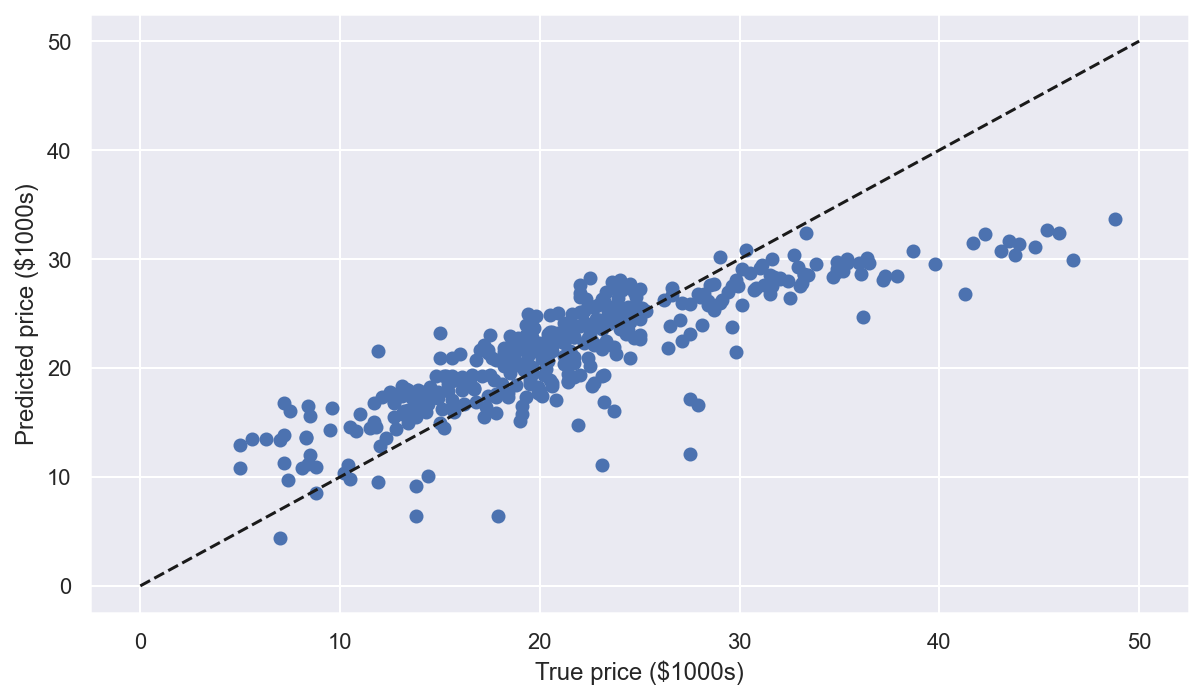

In [55]:
## plt.figure(figsize=(4, 3))
plt.scatter(y_train, y_train_pred_cv)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

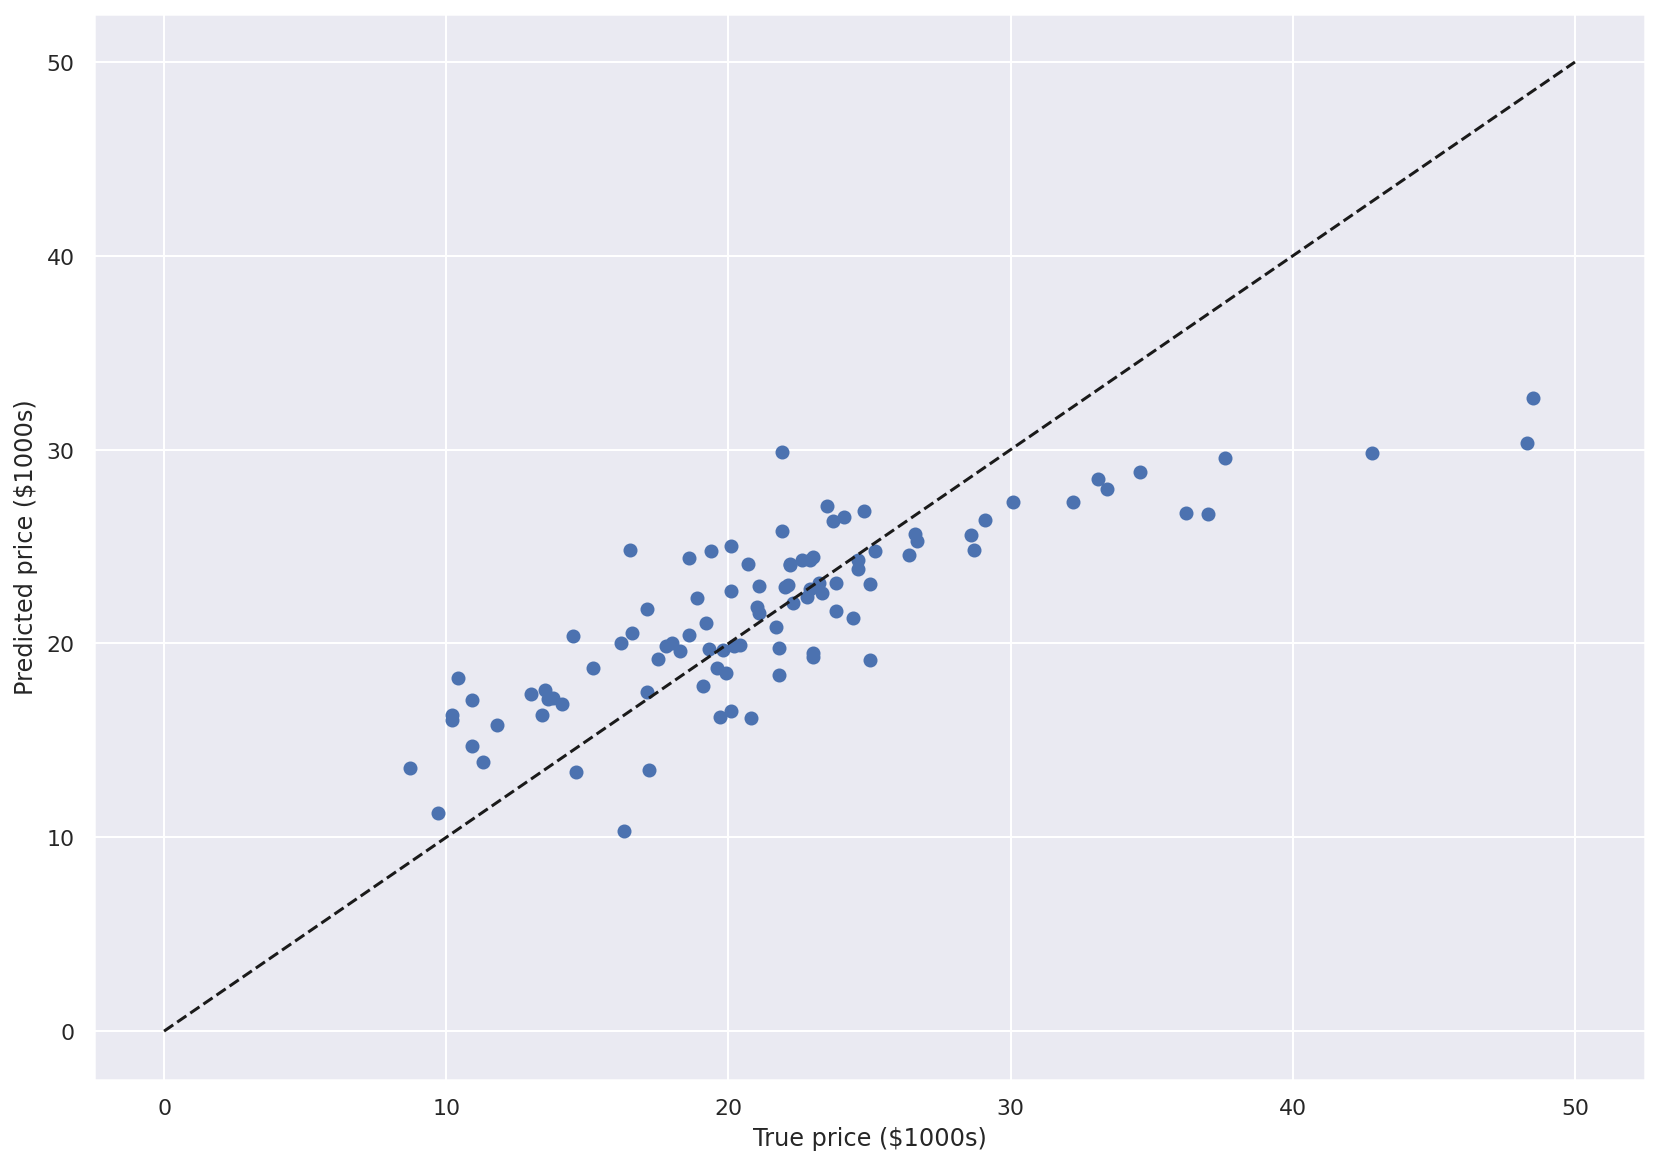

In [52]:
y_test_pred_cv = cross_val_predict(elanet_reg, X_test_scaled, y_test, cv=5)

plt.scatter(y_test, y_test_pred_cv)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

These graphs are not very useful to actually select the best parameters, this is more to explore. Better is to use the method below.

#### Hyperparameters tuning

In [77]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'alpha': [0.0001, 0.001, 0.01, 0.1 ,1, 10],
      'l1_ratio':[.1,.5,.9,1]}
 ]
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(elanet_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(random_state=0),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'l1_ratio': [0.1, 0.5, 0.9, 1]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Score of each hyperparameter combination tested during the grid search:

In [78]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.847102344952446 {'alpha': 0.0001, 'l1_ratio': 0.1}
3.8474750221966567 {'alpha': 0.0001, 'l1_ratio': 0.5}
3.847883828483194 {'alpha': 0.0001, 'l1_ratio': 0.9}
3.847991985987362 {'alpha': 0.0001, 'l1_ratio': 1}
3.8449238460302846 {'alpha': 0.001, 'l1_ratio': 0.1}
3.8451183378206997 {'alpha': 0.001, 'l1_ratio': 0.5}
3.846934766802282 {'alpha': 0.001, 'l1_ratio': 0.9}
3.8478018553065914 {'alpha': 0.001, 'l1_ratio': 1}
3.8700796353997506 {'alpha': 0.01, 'l1_ratio': 0.1}
3.864078196929758 {'alpha': 0.01, 'l1_ratio': 0.5}
3.8525044017372743 {'alpha': 0.01, 'l1_ratio': 0.9}
3.8507591552691065 {'alpha': 0.01, 'l1_ratio': 1}
3.914165107534473 {'alpha': 0.1, 'l1_ratio': 0.1}
3.905496205292023 {'alpha': 0.1, 'l1_ratio': 0.5}
3.896175313697137 {'alpha': 0.1, 'l1_ratio': 0.9}
3.894675219951803 {'alpha': 0.1, 'l1_ratio': 1}
4.166182738515158 {'alpha': 1, 'l1_ratio': 0.1}
4.210686576085665 {'alpha': 1, 'l1_ratio': 0.5}
4.320519091230464 {'alpha': 1, 'l1_ratio': 0.9}
4.364926913548522 {'alpha': 1, 'l

**What is the best combination of paramters?**

In [79]:
grid_search.best_params_

{'alpha': 0.001, 'l1_ratio': 0.1}

In [81]:
grid_search.best_estimator_

ElasticNet(alpha=0.001, l1_ratio=0.1, random_state=0)

You can vizualize the grid search results:

Text(0, 0.5, 'Avg. mean test score')

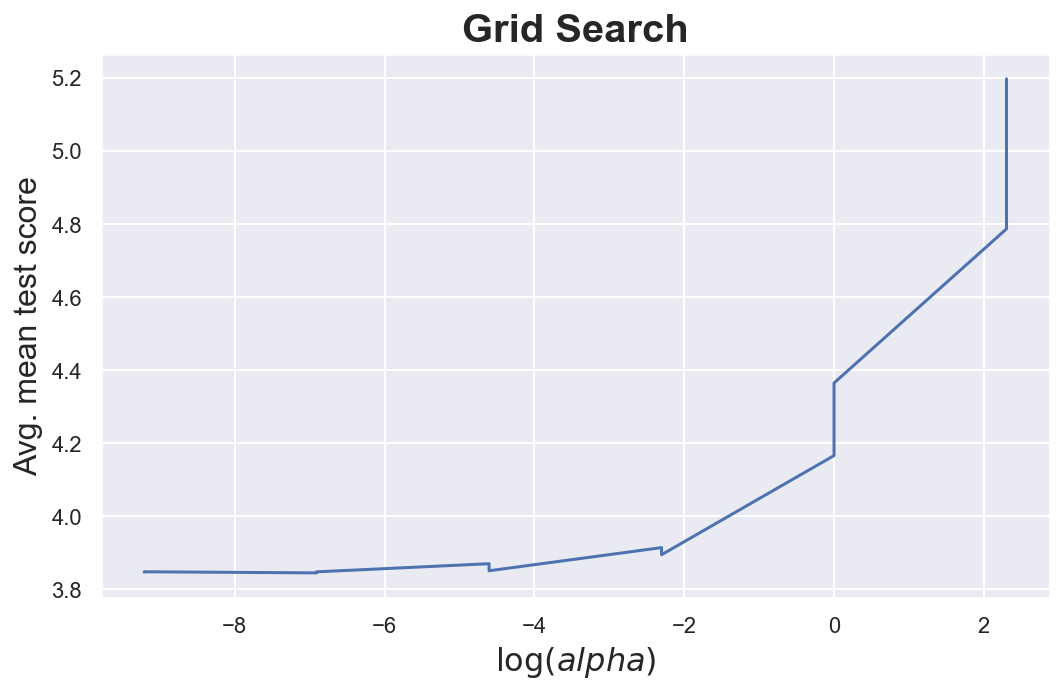

In [82]:
df_cvres=pd.DataFrame(cvres)
df_cvres['mean_test_score_pos_sqrt']=df_cvres['mean_test_score'].apply(lambda x: np.sqrt(-x))
df_cvres['log_param_alpha']=df_cvres['param_alpha'].apply(lambda x: np.log(x))
df_cvres.head()

_, ax = plt.subplots(1,1)
plt.plot(df_cvres["log_param_alpha"], df_cvres["mean_test_score_pos_sqrt"])
ax.set_title("Grid Search", fontsize=20, fontweight='bold')
ax.set_xlabel("$\log (alpha)$", fontsize=16)
ax.set_ylabel('Avg. mean test score', fontsize=16)

Other possibility: for randomized search of hyperparameters

In [83]:
from sklearn.model_selection import RandomizedSearchCV

rand_search = RandomizedSearchCV(elanet_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=ElasticNet(random_state=0),
                   param_distributions=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                   10],
                                         'l1_ratio': [0.1, 0.5, 0.9, 1]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [84]:
rand_search.best_params_

{'l1_ratio': 0.1, 'alpha': 0.001}

In [85]:
rand_search.best_estimator_

ElasticNet(alpha=0.001, l1_ratio=0.1, random_state=0)